# Libraries.

In [39]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from keras import Sequential
from keras.layers import BatchNormalization, Conv2D, Dense, Dropout, MaxPooling2D, Flatten, Input
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
import cv2
X = []
Y = []

# Data Sets

## Glioma Tumor

In [4]:
pth = '/content/drive/MyDrive/Kaggle Competitions/Brain Tumor Classification/archive.zip (Unzipped Files)/Training/glioma_tumor/'
for j in os.listdir(pth):
  img = cv2.imread(pth+'/'+j, cv2.IMREAD_GRAYSCALE)
  img = cv2.resize(img, (150, 150))
  X.append(img)
  Y.append(1)

## Meningioma Tumor

In [5]:
pth = '/content/drive/MyDrive/Kaggle Competitions/Brain Tumor Classification/archive.zip (Unzipped Files)/Training/meningioma_tumor/'
for j in os.listdir(pth):
  img = cv2.imread(pth+'/'+j, cv2.IMREAD_GRAYSCALE)
  img = cv2.resize(img, (150, 150))
  X.append(img)
  Y.append(1)

## Pituitary Tumor

In [6]:
pth = '/content/drive/MyDrive/Kaggle Competitions/Brain Tumor Classification/archive.zip (Unzipped Files)/Training/pituitary_tumor/'
for j in os.listdir(pth):
  img = cv2.imread(pth+'/'+j, cv2.IMREAD_GRAYSCALE)
  img = cv2.resize(img, (150, 150))
  X.append(img)
  Y.append(1)

## No Tumors

In [7]:
pth = '/content/drive/MyDrive/Kaggle Competitions/Brain Tumor Classification/archive.zip (Unzipped Files)/Training/no_tumor/'
for j in os.listdir(pth):
  img = cv2.imread(pth+'/'+j, cv2.IMREAD_GRAYSCALE)
  img = cv2.resize(img, (150, 150))
  X.append(img)
  Y.append(0)

In [8]:
# Reshaping X
X = np.array(X)
X = X/255
X = X.reshape(-1, 150, 150, 1)

In [9]:
Y = np.array(Y)

In [10]:
from collections import Counter
Counter(Y)

Counter({1: 2475, 0: 395})

# Train/Val/Test Split

In [11]:
X.shape, Y.shape

((2870, 150, 150, 1), (2870,))

In [12]:
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size = 0.1, shuffle = True, stratify = Y)
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size = 0.1, shuffle = True, stratify = train_y)

In [13]:
print(Counter(train_y))
print(Counter(val_y))
print(Counter(test_y))

Counter({1: 2005, 0: 319})
Counter({1: 223, 0: 36})
Counter({1: 247, 0: 40})


# Convolution Model.

In [14]:
model = Sequential()
model.add(Conv2D(32, (5, 5), activation = 'relu', input_shape = (150, 150, 1)))
model.add(Conv2D(32, (5, 5), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())

model.add(Conv2D(64, (4, 4), activation = 'relu'))
model.add(Conv2D(64, (4, 4), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), activation = 'relu'))
model.add(Conv2D(256, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(512, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(
    optimizer = 'adam', 
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 146, 146, 32)      832       
                                                                 
 conv2d_1 (Conv2D)           (None, 142, 142, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 71, 71, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 71, 71, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 68, 68, 64)        32832     
                                                                 
 conv2d_3 (Conv2D)           (None, 65, 65, 64)        6

In [16]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)
lr_reduction = ReduceLROnPlateau(monitor = 'val_accuracy', min_lr = 0.00001, patience = 3, factor = 0.5)

## Training

In [17]:
history = model.fit(train_X, train_y, validation_data = [val_X, val_y], epochs = 80, callbacks = [early_stop, lr_reduction])

Epoch 1/80
73/73 [==============================] - 16s 110ms/step - loss: 0.5128 - accuracy: 0.8744 - val_loss: 0.7454 - val_accuracy: 0.8610 - lr: 0.0010
Epoch 2/80
73/73 [==============================] - 6s 79ms/step - loss: 0.1733 - accuracy: 0.9333 - val_loss: 0.5655 - val_accuracy: 0.8610 - lr: 0.0010
Epoch 3/80
73/73 [==============================] - 6s 79ms/step - loss: 0.1264 - accuracy: 0.9527 - val_loss: 5.9381 - val_accuracy: 0.1429 - lr: 0.0010
Epoch 4/80
73/73 [==============================] - 6s 80ms/step - loss: 0.1124 - accuracy: 0.9570 - val_loss: 0.3384 - val_accuracy: 0.8764 - lr: 0.0010
Epoch 5/80
73/73 [==============================] - 6s 80ms/step - loss: 0.0704 - accuracy: 0.9746 - val_loss: 0.8176 - val_accuracy: 0.7027 - lr: 0.0010
Epoch 6/80
73/73 [==============================] - 6s 82ms/step - loss: 0.0692 - accuracy: 0.9750 - val_loss: 0.1757 - val_accuracy: 0.9151 - lr: 0.0010
Epoch 7/80
73/73 [==============================] - 6s 87ms/step - loss: 0

## Evaluation

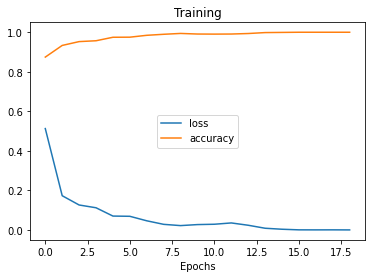

In [18]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.legend(loc="center")
plt.xlabel('Epochs')
plt.title('Training')
plt.show()

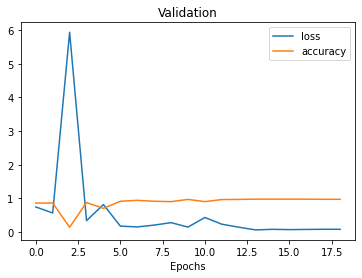

In [19]:
plt.plot(history.history['val_loss'], label = 'loss')
plt.plot(history.history['val_accuracy'], label = 'accuracy')
plt.legend(loc="upper right")
plt.xlabel('Epochs')
plt.title('Validation')
plt.show()

# Predictions

## Training

In [20]:
train_pred = model.predict(train_X)
train_classes = [1 if p > 0.5 else 0 for p in train_pred]

73/73 [==============================] - 3s 35ms/step


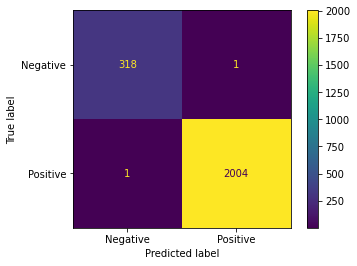

In [46]:
train_matrix = confusion_matrix(train_y, train_classes)
cmd = ConfusionMatrixDisplay(train_matrix, display_labels = ['Negative', 'Positive'])
cmd.plot()

## Validation

In [22]:
val_pred = model.predict(val_X)
val_classes = [1 if p > 0.5 else 0 for p in val_pred]

9/9 [==============================] - 0s 30ms/step


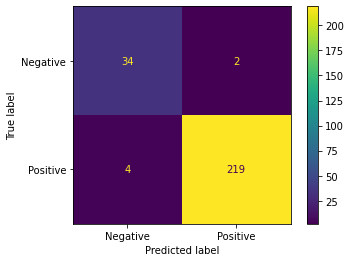

In [45]:
val_matrix = confusion_matrix(val_y, val_classes)
cmd = ConfusionMatrixDisplay(val_matrix, display_labels = ['Negative', 'Positive'])
cmd.plot()

## Test

In [24]:
test_pred = model.predict(test_X)
test_classes = [1 if p > 0.5 else 0 for p in test_pred]

9/9 [==============================] - 1s 135ms/step


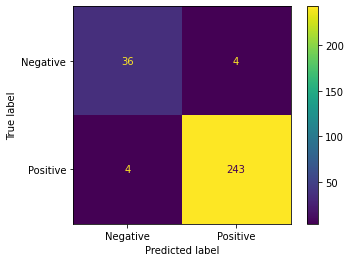

In [44]:
test_matrix = confusion_matrix(test_y, test_classes)
cmd = ConfusionMatrixDisplay(test_matrix, display_labels = ['Negative', 'Positive'])
cmd.plot()

# Visualisations

## No Tumors
Truth = Negative | Predicted = Negative

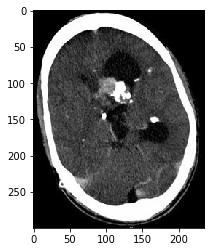

In [26]:
img = image.load_img('/content/drive/MyDrive/Kaggle Competitions/Brain Tumor Classification/archive.zip (Unzipped Files)/Testing/no_tumor/image(89).jpg')
plt.imshow(img, interpolation = 'nearest')

In [27]:
img_array = cv2.imread('/content/drive/MyDrive/Kaggle Competitions/Brain Tumor Classification/archive.zip (Unzipped Files)/Testing/no_tumor/image(89).jpg', cv2.IMREAD_GRAYSCALE)
img_array = cv2.resize(img_array, (150, 150))
img_array = img_array.reshape(-1, 150, 150, 1)
visualisation_prediction = model.predict(img_array)
visualisation_prediction = [1 if p > 0.5 else 0 for p in visualisation_prediction]
visualisation_prediction

1/1 [==============================] - 0s 393ms/step


[0]

## Tumors

### Glioma
Truth = Positive | Predicted = Negative

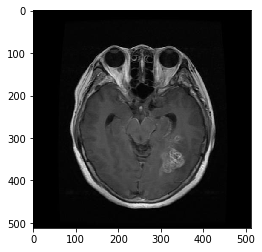

In [28]:
img2 = image.load_img('/content/drive/MyDrive/Kaggle Competitions/Brain Tumor Classification/archive.zip (Unzipped Files)/Testing/glioma_tumor/image(74).jpg')
plt.imshow(img2, interpolation = 'nearest')

In [29]:
img_array2 = cv2.imread('/content/drive/MyDrive/Kaggle Competitions/Brain Tumor Classification/archive.zip (Unzipped Files)/Testing/glioma_tumor/image(74).jpg', cv2.IMREAD_GRAYSCALE)
img_array2 = cv2.resize(img_array2, (150, 150))
img_array2 = img_array2.reshape(-1, 150, 150, 1)
visualisation_prediction2 = model.predict(img_array2)
visualisation_prediction2 = [1 if p > 0.5 else 0 for p in visualisation_prediction2]
visualisation_prediction2

1/1 [==============================] - 0s 18ms/step


[0]

### Meningioma
Truth = Positive | Predicted = Negative

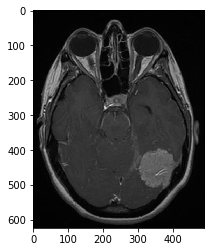

In [30]:
img3 = image.load_img('/content/drive/MyDrive/Kaggle Competitions/Brain Tumor Classification/archive.zip (Unzipped Files)/Testing/meningioma_tumor/image(8).jpg')
plt.imshow(img3, interpolation = 'nearest')

In [31]:
img_array3 = cv2.imread('/content/drive/MyDrive/Kaggle Competitions/Brain Tumor Classification/archive.zip (Unzipped Files)/Testing/meningioma_tumor/image(8).jpg', cv2.IMREAD_GRAYSCALE)
img_array3 = cv2.resize(img_array3, (150, 150))
img_array3 = img_array3.reshape(-1, 150, 150, 1)
visualisation_prediction3 = model.predict(img_array3)
visualisation_prediction3 = [1 if p > 0.5 else 0 for p in visualisation_prediction3]
visualisation_prediction3

1/1 [==============================] - 0s 19ms/step


[0]

### Pituitary
Truth = Positive | Predicted = Negative

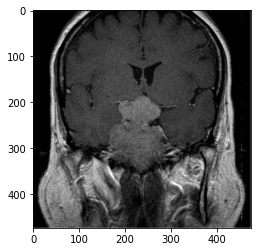

In [32]:
img4 = image.load_img('/content/drive/MyDrive/Kaggle Competitions/Brain Tumor Classification/archive.zip (Unzipped Files)/Testing/pituitary_tumor/image(6).jpg')
plt.imshow(img4)

In [33]:
img_array4 = cv2.imread('/content/drive/MyDrive/Kaggle Competitions/Brain Tumor Classification/archive.zip (Unzipped Files)/Testing/meningioma_tumor/image(6).jpg', cv2.IMREAD_GRAYSCALE)
img_array4 = cv2.resize(img_array4, (150, 150))
img_array4 = img_array4.reshape(-1, 150, 150, 1)
visualisation_prediction4 = model.predict(img_array4)
visualisation_prediction4 = [1 if p > 0.5 else 0 for p in visualisation_prediction4]
visualisation_prediction4

1/1 [==============================] - 0s 17ms/step


[0]

## Entire Test Set.

In [34]:
import os
import cv2
X = []
Y = []

pth = '/content/drive/MyDrive/Kaggle Competitions/Brain Tumor Classification/archive.zip (Unzipped Files)/Testing/glioma_tumor/'
for j in os.listdir(pth):
  img = cv2.imread(pth+'/'+j, cv2.IMREAD_GRAYSCALE)
  img = cv2.resize(img, (150, 150))
  X.append(img)
  Y.append(1)

pth = '/content/drive/MyDrive/Kaggle Competitions/Brain Tumor Classification/archive.zip (Unzipped Files)/Testing/meningioma_tumor/'
for j in os.listdir(pth):
  img = cv2.imread(pth+'/'+j, cv2.IMREAD_GRAYSCALE)
  img = cv2.resize(img, (150, 150))
  X.append(img)
  Y.append(1)

pth = '/content/drive/MyDrive/Kaggle Competitions/Brain Tumor Classification/archive.zip (Unzipped Files)/Testing/pituitary_tumor/'
for j in os.listdir(pth):
  img = cv2.imread(pth+'/'+j, cv2.IMREAD_GRAYSCALE)
  img = cv2.resize(img, (150, 150))
  X.append(img)
  Y.append(1)

pth = '/content/drive/MyDrive/Kaggle Competitions/Brain Tumor Classification/archive.zip (Unzipped Files)/Testing/no_tumor/'
for j in os.listdir(pth):
  img = cv2.imread(pth+'/'+j, cv2.IMREAD_GRAYSCALE)
  img = cv2.resize(img, (150, 150))
  X.append(img)
  Y.append(0)

# Reshaping X
X = np.array(X)
X = X/255
X = X.reshape(-1, 150, 150, 1)
Y = np.array(Y)

In [35]:
pred = model.predict(X)
entire_test_set_predictions = [1 if p > 0.5 else 0 for p in pred]

13/13 [==============================] - 1s 60ms/step


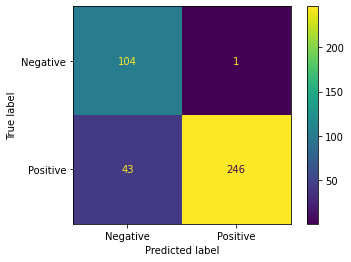

In [43]:
cf_matrix = confusion_matrix(Y, entire_test_set_predictions)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels = ['Negative', 'Positive'])
cmd.plot()

In [37]:
Counter(Y)

Counter({1: 289, 0: 105})